In [1047]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


Data Source: https://data.world/makeovermonday/2018w19-toughest-sport-by-skill

In [1048]:
df = pd.read_excel('/home/nzuleta/dataScience/Data-Science-Portfolio/data/Toughest Sport by Skill.xlsx')

In [1049]:
df.head()

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Total,Rank
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375,1
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,71.750,2
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13,68.375,3
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875,4
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38,63.500,5


In [1050]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sport                  60 non-null     object 
 1   Endurance              60 non-null     float64
 2   Strength               60 non-null     float64
 3   Power                  60 non-null     float64
 4   Speed                  60 non-null     float64
 5   Agility                60 non-null     float64
 6   Flexibility            60 non-null     float64
 7   Nerve                  60 non-null     float64
 8   Durability             60 non-null     float64
 9   Hand-Eye Coordination  60 non-null     float64
 10  Analytical Aptitude    60 non-null     float64
 11  Total                  60 non-null     float64
 12  Rank                   60 non-null     int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 6.2+ KB


In [1051]:
df.describe()

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Total,Rank
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.077667,5.169000,5.509167,4.815000,4.765000,4.723167,4.614833,4.612833,4.954833,4.767333,48.983333,30.400000
std,2.094217,1.715357,1.980397,2.266403,1.927273,1.704369,2.442645,1.882102,1.966328,1.576830,12.170519,17.473661
min,1.000000,1.000000,1.250000,0.630000,1.000000,1.130000,0.880000,0.750000,1.880000,2.250000,14.500000,1.000000
25%,3.500000,3.880000,4.097500,3.000000,3.437500,3.847500,2.597500,3.380000,3.130000,3.437500,44.093750,15.750000
50%,4.630000,5.190000,5.690000,5.130000,4.755000,4.750000,4.190000,4.630000,4.440000,4.250000,48.000000,30.000000
75%,6.660000,6.130000,7.130000,6.410000,6.380000,5.532500,6.532500,5.782500,6.630000,6.160000,56.031250,45.250000
max,9.630000,9.250000,9.750000,9.880000,8.250000,10.000000,9.880000,8.500000,9.250000,7.500000,72.375000,60.000000


In [1052]:
df_total_rank = df[['Sport', 'Total', 'Rank']]
df_total_rank.head()

,Sport,Total,Rank
0,Boxing,72.375,1
1,Ice Hockey,71.750,2
2,Football,68.375,3
3,Basketball,67.875,4
4,Wrestling,63.500,5


In [1053]:
df_skills = df.drop(['Total', 'Rank'], axis=1)
df_skills.head()

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38


Text(158.22222222222223, 0.5, 'Sport')

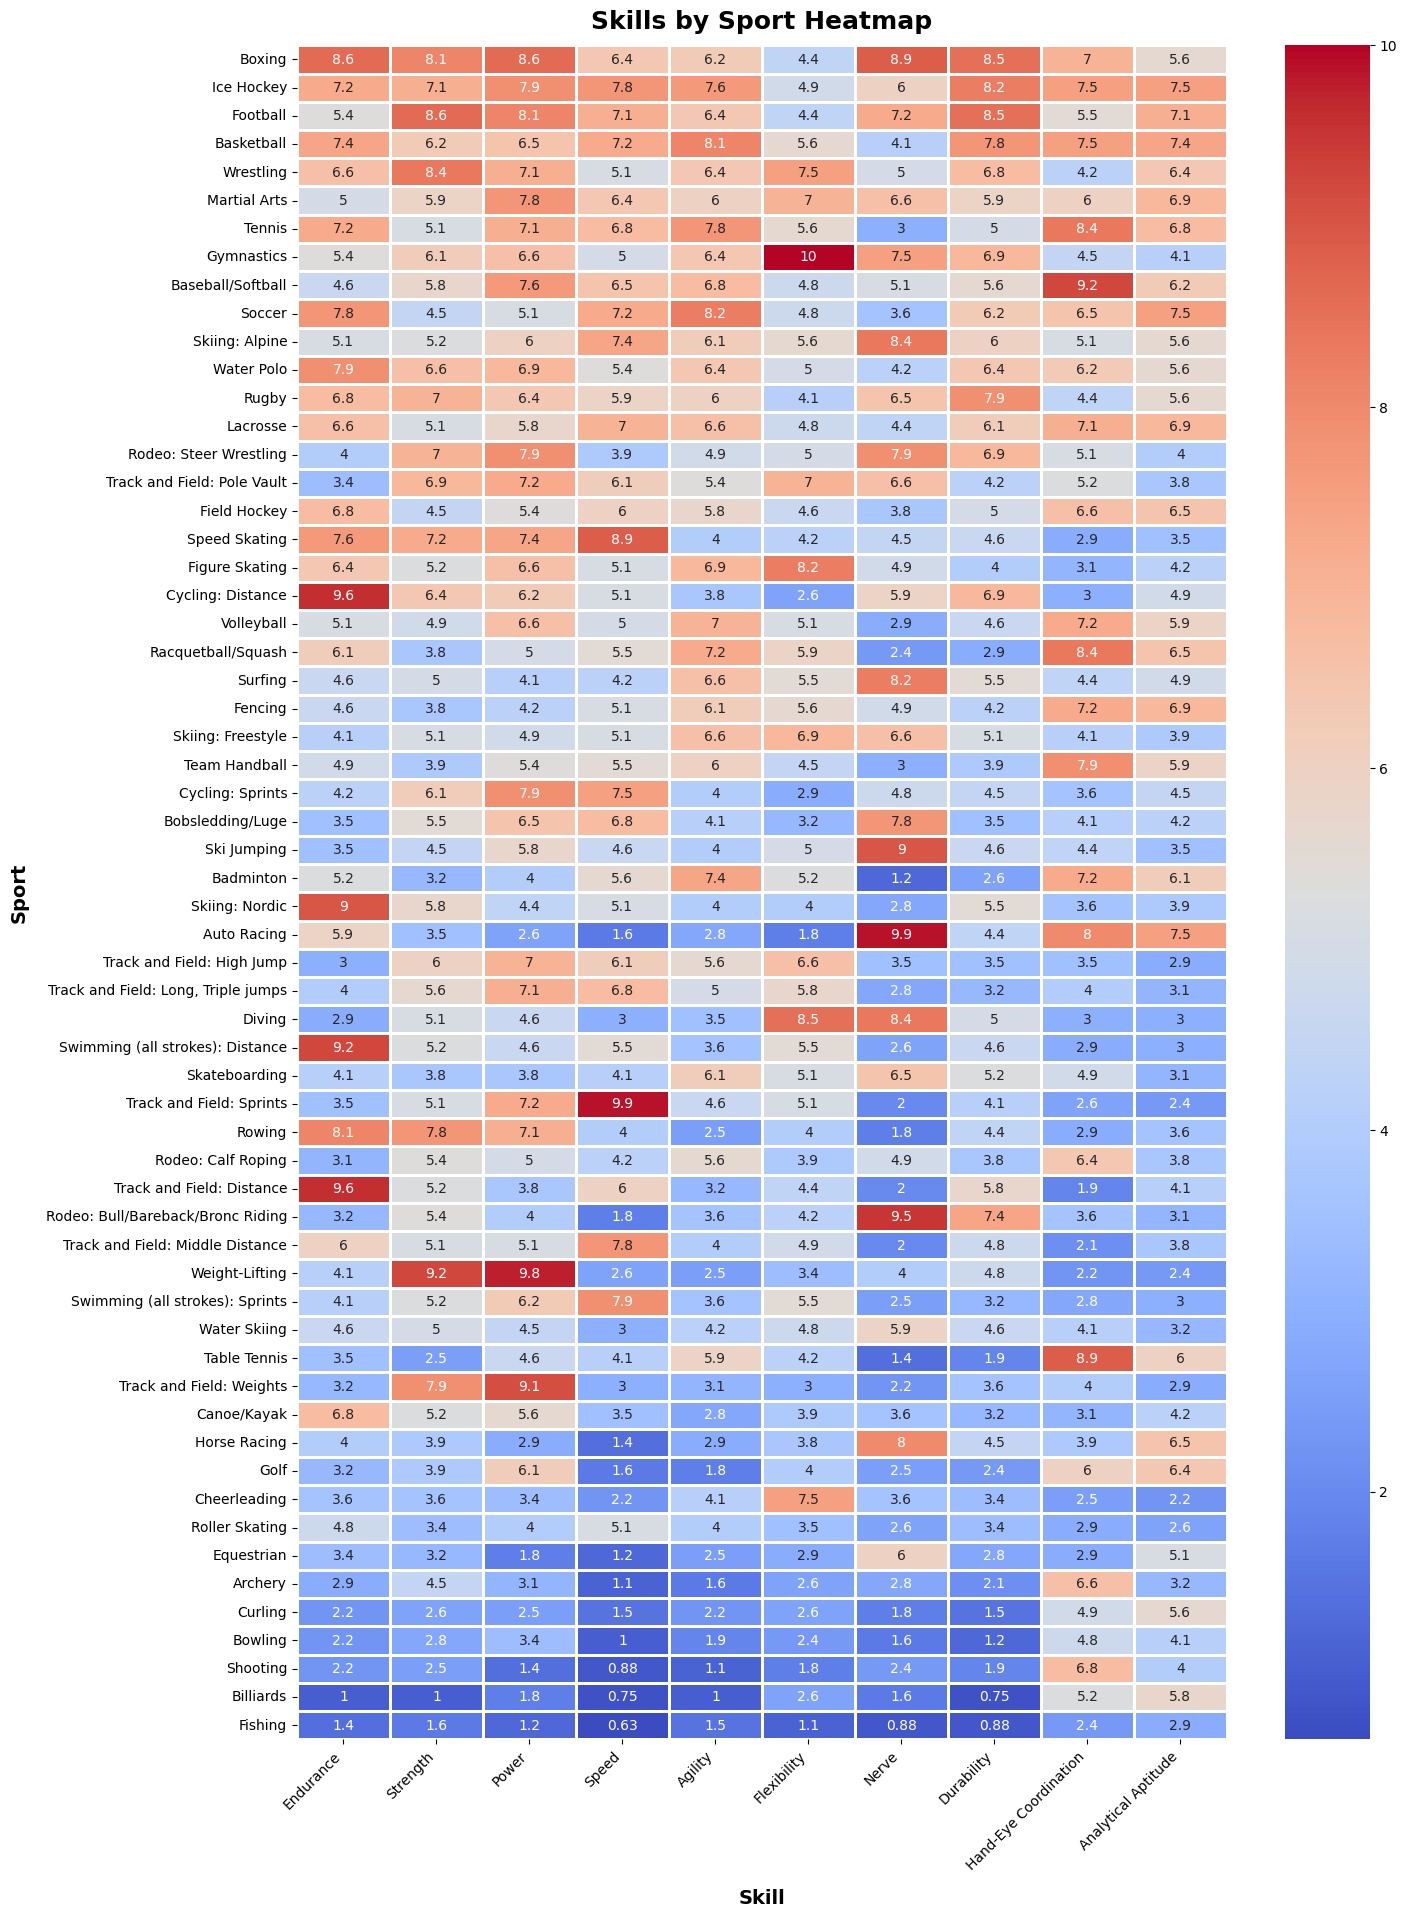

In [1054]:
df_skills = df_skills.set_index('Sport')

fig, ax = plt.subplots(figsize=(15,22))

skills_heatmap = sns.heatmap(df_skills, annot=True, cmap='coolwarm', ax=ax,linewidths=2, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
colorbar = skills_heatmap.collections[0].colorbar
skills_heatmap.set_title('Skills by Sport Heatmap', fontdict={'fontsize':18}, pad=12, fontweight='bold')
skills_heatmap.set_xlabel('Skill', fontdict={'fontsize':14}, labelpad=12, fontweight='bold')
skills_heatmap.set_ylabel('Sport', fontdict={'fontsize':14}, labelpad=12, fontweight='bold')

In [1055]:
import panel as pn
pn.extension('ipywidgets')

mpl_pane = pn.pane.Matplotlib(fig, dpi=144)

In [1056]:

df_skills.head()

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude
Sport,,,,,,,,,,
Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63
Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50
Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13
Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38
Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38


In [1057]:
sports = df_skills.index.tolist()
skills = df_skills.columns.tolist()

In [1058]:
def get_skills_graph_by_sport(sport_select='Boxing'):
    c = ['#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2']
    sport_skills = df_skills.loc[sport_select]
    fig, ax = plt.subplots(figsize=(10,8))
    barPlot = ax.bar(skills, sport_skills, color=c)
    ax.set_title(f'{sport_select} Skills', fontdict={'fontsize':18}, pad=20, fontweight='bold')
    ax.set_xlabel('Skill', fontdict={'fontsize':14}, labelpad=20, fontweight='bold')
    ax.set_ylabel('Skill Level', fontdict={'fontsize':14}, labelpad=20, fontweight='bold')
    ax.set_xticklabels(skills, rotation=45, horizontalalignment='right')
    for rect in barPlot:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    plt.tight_layout()
    plt.close()
    return fig

In [1059]:
df_T = df_skills.transpose().reset_index()

In [1060]:
df_T = df_T.rename(columns= {'index': 'Skill'})
df_T = df_T.set_index('Skill')
df_T.head()


Sport,Boxing,Ice Hockey,Football,Basketball,Wrestling,Martial Arts,Tennis,Gymnastics,Baseball/Softball,Soccer,...,Golf,Cheerleading,Roller Skating,Equestrian,Archery,Curling,Bowling,Shooting,Billiards,Fishing
Skill,,,,,,,,,,,,,,,,,,,,,
Endurance,8.63,7.25,5.38,7.38,6.63,5.00,7.25,5.38,4.63,7.75,...,3.25,3.63,4.75,3.38,2.88,2.25,2.25,2.25,1.00,1.38
Strength,8.13,7.13,8.63,6.25,8.38,5.88,5.13,6.13,5.75,4.50,...,3.88,3.63,3.38,3.25,4.50,2.63,2.75,2.50,1.00,1.63
Power,8.63,7.88,8.13,6.50,7.13,7.75,7.13,6.63,7.63,5.13,...,6.13,3.38,4.00,1.75,3.13,2.50,3.38,1.38,1.75,1.25
Speed,6.38,7.75,7.13,7.25,5.13,6.38,6.75,5.00,6.50,7.25,...,1.63,2.25,5.13,1.25,1.13,1.50,1.00,0.88,0.75,0.63
Agility,6.25,7.63,6.38,8.13,6.38,6.00,7.75,6.38,6.75,8.25,...,1.75,4.13,4.00,2.50,1.63,2.25,1.88,1.13,1.00,1.50


In [1061]:
def get_Top10Sports_graph_by_skill(skill_select='Agility'):
    c = ['#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2']
    skill_sports_scores = df_T.loc[skill_select].nlargest(n=10).sort_values(ascending=True)
    fig, ax = plt.subplots(figsize=(10,8))
    lollipopPlot = ax.hlines(skill_sports_scores.index, xmin=0, xmax=skill_sports_scores, color=c, linewidth=2)
    ax.plot(skill_sports_scores, skill_sports_scores.index, "o", color='black', markersize=5)
    ax.set_title(f'Top 10 Sports by {skill_select}', fontdict={'fontsize':18}, pad=20, fontweight='bold')
    ax.set_xlabel('Skill Level', fontdict={'fontsize':14}, labelpad=20, fontweight='bold')
    ax.set_ylabel('Sport', fontdict={'fontsize':14}, labelpad=20, fontweight='bold')
    
    for x,y in zip(skill_sports_scores, skill_sports_scores.index):
        label = "{:.2f}".format(x)
        ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center')
    
    plt.tight_layout()
    plt.close()
    return fig
    

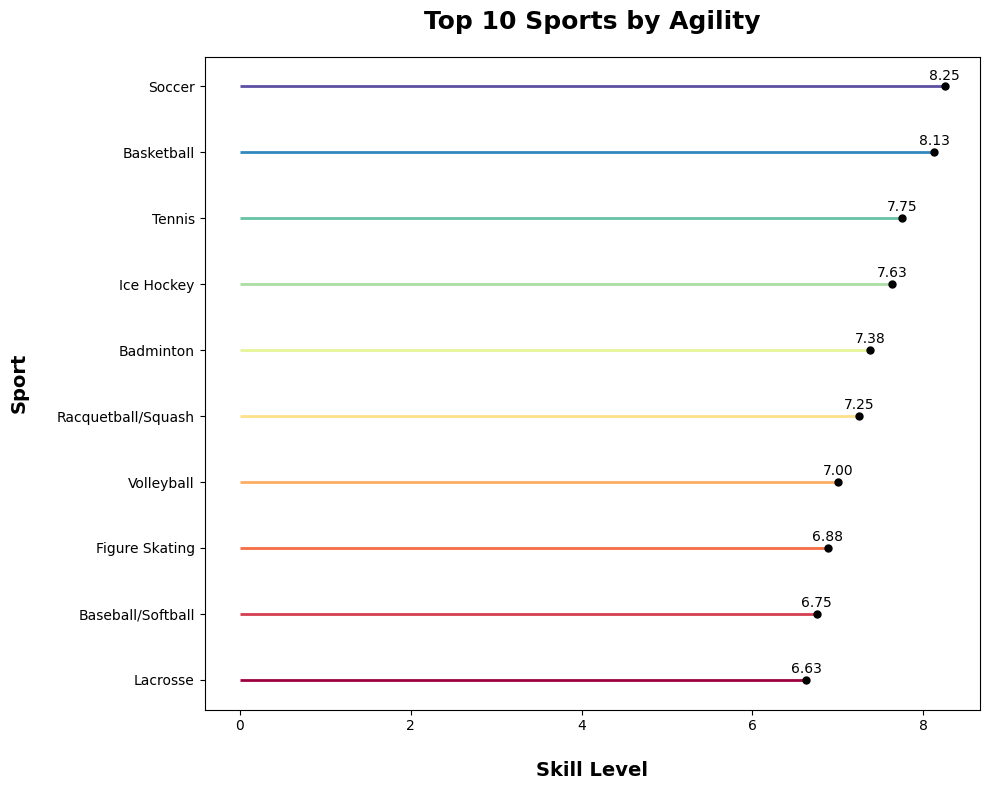

In [1062]:
get_Top10Sports_graph_by_skill()

In [1063]:
skill_select = pn.widgets.Select(name='Skill', options=skills)

In [1064]:
sport_select = pn.widgets.Select(name='Sport', options=sports)

In [1065]:
interactive2 = pn.bind(get_Top10Sports_graph_by_skill, skill_select=skill_select)


In [1066]:
interactive = pn.bind(get_skills_graph_by_sport, sport_select=sport_select)


In [1067]:
first_app = pn.Row(mpl_pane, pn.Column(pn.Spacer(height=100), pn.pane.Alert('## Sport Detail\nPlease select a sport to see the skill details below:'),sport_select, interactive,pn.pane.Alert('## Skill Detail\nPlease select a Skill to see the top 10 Sports for that skill:'), skill_select, interactive2),height=1800, width=2600)

first_app

/tmp/ipykernel_20042/758002932.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(skills, rotation=45, horizontalalignment='right')


BokehModel(combine_events=True, render_bundle={'docs_json': {'a741b366-dcb9-434e-ae81-36d6de52223e': {'defs': …

In [1068]:
from bokeh.resources import INLINE
first_app.save('skillsBySport.html', resources=INLINE)